# Libraries

In [151]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import scipy.stats
from scipy.stats import chi2_contingency
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to C:\Users\Quebec online
[nltk_data]     school\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Quebec
[nltk_data]     online school\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Products

In [88]:
#import product information
products = pd.read_csv("product_info.csv")
products.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [89]:
products.describe()

brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000        1.750000         0.000000     0.000000   
25%          45.000000        8.000000         0.000000     0.000000   
50%          67.000000       14.000000         0.000000     0.000000   
75%         108.500000       25.000000         0.000000     0.000000   
max         617.000000      320.000000         1.000000     1.000000   

       online_only  out_of_stock  sephora_exclusive  child_count  \
count  8494.000000   8494.000000        8494.000000  8494.000000   
mean      0.219096      0.073699           0.279374     1.631622   
std       0.413658      0.261296           0.448718     5.379470   
min       0.000000      0.000000           0.000000     0.000000   
25%       0.000000      0.000000           0.000000     0.000000   
50%       0.000000      0.000000           0.000000     0.000000   
75%       0.000000      0.000000           1.000000     1.000000   
max       1.000000      1.000000           1.000000   105.000000   

       child_max_price  child_min_price  
count      2754.000000      2754.000000  
mean         53.792023        39.665802  
std          58.765894        38.685720  
min           3.000000         3.000000  
25%          22.000000        19.000000  
50%          32.000000        28.000000  
75%          59.000000        42.000000  
max         570.000000       400.000000

In [90]:
products.copy()

product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count  rating  reviews             size  \
0                  19-69         6320  3.6364     11.0              NaN   
1                  19-69         3827  4.1538     13.0   3.4 oz/ 100 mL   
2                  19-69         3253  4.2500     16.0   3.4 oz/ 100 mL   
3                  19-69         3018  4.4762     21.0   3.4 oz/ 100 mL   
4                  19-69         2691  3.2308     13.0   3.4 oz/ 100 mL   
...                  ...          ...     ...      ...              ...   
8489  Yves Saint Laurent         2790  4.4286      7.0              NaN   
8490  Yves Saint Laurent         2319  4.6367    556.0     2 oz / 60 mL   
8491  Yves Saint Laurent         1475  5.0000      2.0              NaN   
8492  Yves Saint Laurent          840     NaN      NaN              NaN   
8493  Yves Saint Laurent          193     NaN      NaN  .11 oz / 3.2 mL   

                          variation_type                   variation_value  \
0                                    NaN                               NaN   
1     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
2     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
3     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
4     Size + Concentration + Formulation                    3.4 oz/ 100 mL   
...                                  ...                               ...   
8489                                 NaN                               NaN   
8490  Size + Concentration + Formulation  2 oz / 60 mL eau de parfum spray   
8491                                 NaN                               NaN   
8492                                 NaN                               NaN   
8493                               Color                               NaN   

      ... online_only out_of_stock  sephora_exclusive  \
0     ...           1            0                  0   
1     ...           1            0                  0   
2     ...           1            0                  0   
3     ...           1            0                  0   
4     ...           1            0                  0   
...   ...         ...          ...                ...   
8489  ...           0            0                  0   
8490  ...           0            0                  0   
8491  ...           1            1                  0   
8492  ...           1            0                  0   
8493  ...           1            0                  1   

                                             highlights  primary_category  \
0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
...                                                 ...    

In [91]:
#convert boolean columns
products['limited_edition'] = products['limited_edition'].astype(bool)
products['new'] = products['new'].astype(bool)
products['online_only'] = products['online_only'].astype(bool)
products['sephora_exclusive'] = products['sephora_exclusive'].astype(bool)

In [92]:
#check for percentage of null data from products dataset
percent_null_p = products.isna().mean()
print(percent_null_p)

product_id            0.000000
product_name          0.000000
brand_id              0.000000
brand_name            0.000000
loves_count           0.000000
rating                0.032729
reviews               0.032729
size                  0.192018
variation_type        0.170002
variation_value       0.188133
variation_desc        0.852837
ingredients           0.111255
price_usd             0.000000
value_price_usd       0.946904
sale_price_usd        0.968213
limited_edition       0.000000
new                   0.000000
online_only           0.000000
out_of_stock          0.000000
sephora_exclusive     0.000000
highlights            0.259830
primary_category      0.000000
secondary_category    0.000942
tertiary_category     0.116553
child_count           0.000000
child_max_price       0.675771
child_min_price       0.675771
dtype: float64


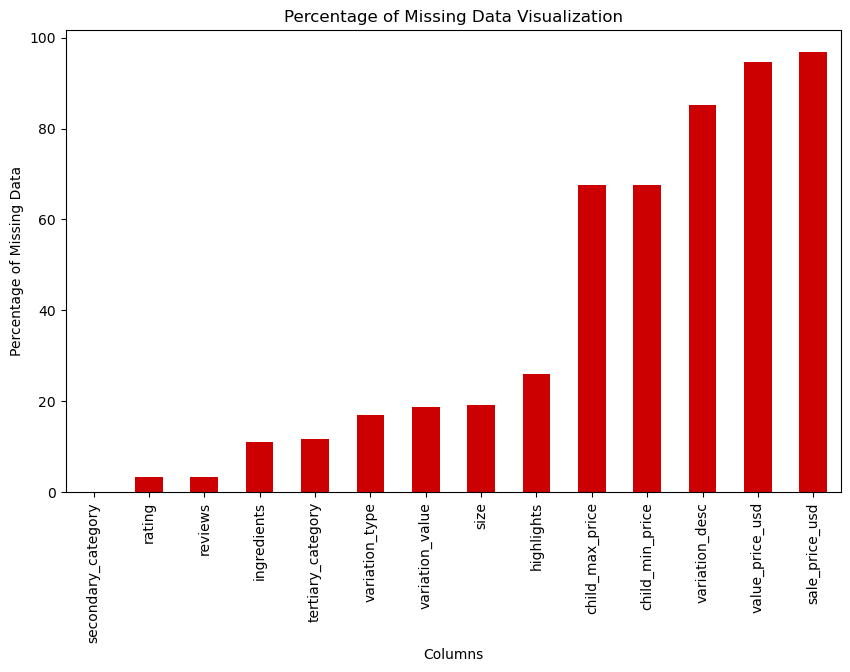

In [93]:
#visualise this 
missing_product_percent = (products.isna().mean() * 100).round(2)
missing_product_percent[missing_product_percent > 0].sort_values().plot(kind='bar', figsize=(10, 6), color='#cc0000')
plt.title('Percentage of Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.show()

In [94]:
#drop columns with large percentage of missing data or columns irrelavent to my hypothesis 
drop_columns_p = ['value_price_usd', 'sale_price_usd', 'variation_desc', 'child_min_price', 
                'child_max_price', 'size', 'variation_value', 'variation_type', 'child_count', 'sephora_exclusive',
               'out_of_stock', 'online_only', 'new', 'limited_edition' ]
f_products = products.drop(columns=drop_columns_p)

# REVIEWS

In [95]:
#import review files
r1 = pd.read_csv('reviews_0-250.csv', index_col=0, dtype={'author_id': 'str'})
r2 = pd.read_csv("reviews_250-500.csv", index_col=0, dtype={'author_id': 'str'})
r3 = pd.read_csv("reviews_500-750.csv", index_col=0, dtype={'author_id': 'str'})
r4 = pd.read_csv("reviews_750-1250.csv", index_col=0, dtype={'author_id': 'str'})
r5 = pd.read_csv("reviews_1250-end.csv", index_col=0, dtype={'author_id': 'str'})

In [96]:
#combine files together
reviews = pd.concat([r1,r2,r3,r4,r5])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   author_id                 1094411 non-null  object 
 1   rating                    1094411 non-null  int64  
 2   is_recommended            926423 non-null   float64
 3   helpfulness               532819 non-null   float64
 4   total_feedback_count      1094411 non-null  int64  
 5   total_neg_feedback_count  1094411 non-null  int64  
 6   total_pos_feedback_count  1094411 non-null  int64  
 7   submission_time           1094411 non-null  object 
 8   review_text               1092967 non-null  object 
 9   review_title              783757 non-null   object 
 10  skin_tone                 923872 non-null   object 
 11  eye_color                 884783 non-null   object 
 12  skin_type                 982854 non-null   object 
 13  hair_color                867643 n

In [97]:
reviews.describe()

rating  is_recommended    helpfulness  total_feedback_count  \
count  1.094411e+06   926423.000000  532819.000000          1.094411e+06   
mean   4.299158e+00        0.839962       0.767782          4.177126e+00   
std    1.149444e+00        0.366642       0.317164          2.271524e+01   
min    1.000000e+00        0.000000       0.000000          0.000000e+00   
25%    4.000000e+00        1.000000       0.652174          0.000000e+00   
50%    5.000000e+00        1.000000       0.928571          0.000000e+00   
75%    5.000000e+00        1.000000       1.000000          3.000000e+00   
max    5.000000e+00        1.000000       1.000000          5.464000e+03   

       total_neg_feedback_count  total_pos_feedback_count     price_usd  
count              1.094411e+06              1.094411e+06  1.094411e+06  
mean               8.948695e-01              3.282257e+00  4.900838e+01  
std                5.288943e+00              1.967482e+01  4.004338e+01  
min                0.000000e+00              0.000000e+00  3.000000e+00  
25%                0.000000e+00              0.000000e+00  2.500000e+01  
50%                0.000000e+00              0.000000e+00  3.900000e+01  
75%                1.000000e+00              3.000000e+00  6.200000e+01  
max                1.159000e+03              5.050000e+03  1.900000e+03

In [98]:
# convert submission time to datetime
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])
#convert boolean columns
reviews['is_recommended'] = reviews['is_recommended'].astype(bool)

In [99]:
#check for percentage of null data from reviews dataset
percent_null_r = reviews.isna().mean()
print(percent_null_r)

author_id                   0.000000
rating                      0.000000
is_recommended              0.000000
helpfulness                 0.513145
total_feedback_count        0.000000
total_neg_feedback_count    0.000000
total_pos_feedback_count    0.000000
submission_time             0.000000
review_text                 0.001319
review_title                0.283855
skin_tone                   0.155827
eye_color                   0.191544
skin_type                   0.101933
hair_color                  0.207206
product_id                  0.000000
product_name                0.000000
brand_name                  0.000000
price_usd                   0.000000
dtype: float64


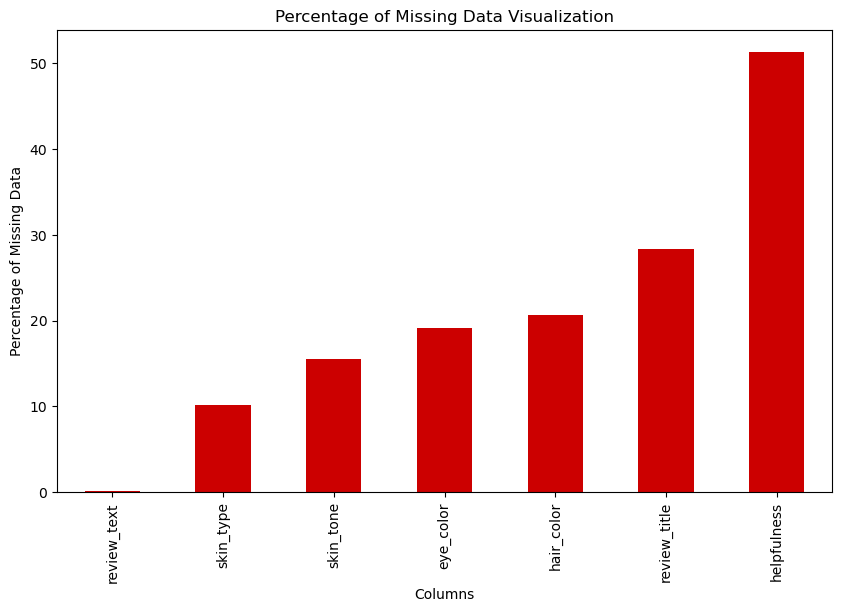

In [100]:
#visualise this 
missing_review_percent = (reviews.isna().mean() * 100).round(2)
missing_review_percent[missing_review_percent > 0].sort_values().plot(kind='bar', figsize=(10, 6), color='#cc0000')
plt.title('Percentage of Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.show()

In [101]:
#drop columns with large percentage of missing data or columns irrelavent to my hypothesis 
drop_columns_r = ['helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count' ]
f_reviews = reviews.drop(columns=drop_columns_r)

# Combine Dataset 

In [102]:
# drop rating from products category
drop_columns_p = ['rating', 'price_usd', 'product_name', 'brand_name', 'loves_count', 'brand_id']
f_products = f_products.drop(columns=drop_columns_p)

In [103]:
#combine products and reviews
product_reviews = pd.merge(f_reviews,f_products, on='product_id')

In [104]:
#check for numeric columns
numeric_columns = product_reviews.select_dtypes(include = ['number']). columns
print(numeric_columns)
print(f'{len(numeric_columns)} Numeric Columns in Dataset')

Index(['rating', 'price_usd', 'reviews'], dtype='object')
3 Numeric Columns in Dataset


In [105]:
# check for categorical columns
categorical_columns = product_reviews.select_dtypes(exclude = ['number']).columns
print(categorical_columns)
print(f'{len(categorical_columns)} Categorical Columns in Dataset')

Index(['author_id', 'is_recommended', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')
17 Categorical Columns in Dataset


# Top 10 Highest Rated Toners for Dry Skin

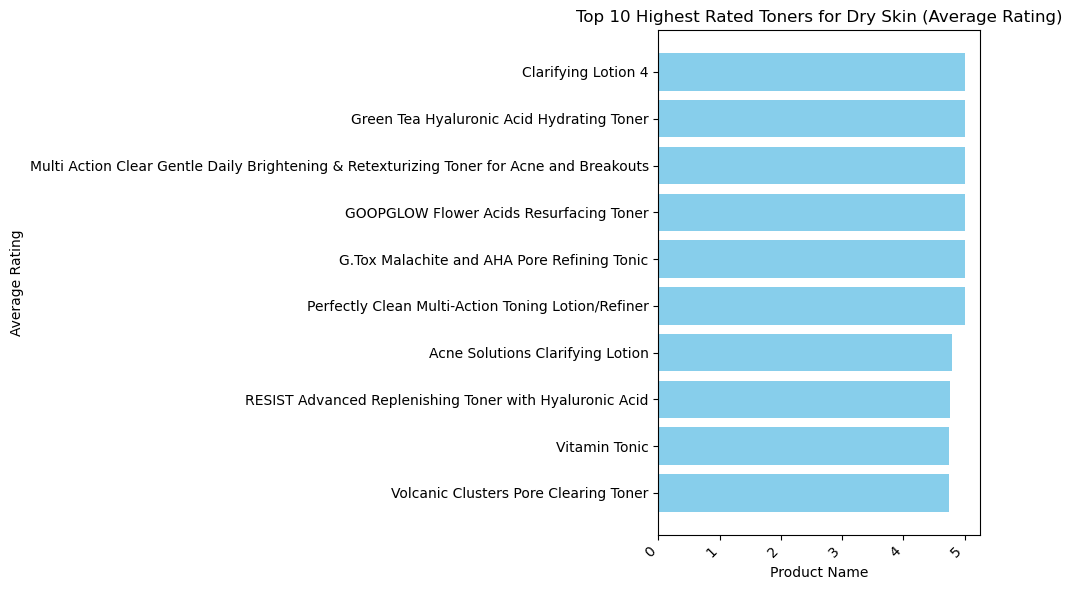

In [106]:
# Select relevant columns
toner_rating = product_reviews[['product_name', 'rating', 'skin_type', 'ingredients', 'highlights']]

# Filter data for toner and oily skin only using str.contains
toner_rating = product_reviews[
    (product_reviews['tertiary_category'].str.contains('Toner', case=False)) &
    (product_reviews['skin_type'].str.contains('Dry', case=False))
]

# Group by product and calculate the average (mean) of ratings
product_avg_ratings = toner_rating.groupby('product_name')['rating'].mean().reset_index()

# Sort by the average rating descending
product_avg_ratings = product_avg_ratings.sort_values(by='rating', ascending=False)

# Select top 10 best-rated toners
top_10_toners = product_avg_ratings.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_toners['product_name'], top_10_toners['rating'], color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Product Name')
plt.title('Top 10 Highest Rated Toners for Dry Skin (Average Rating)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()


Ingredients

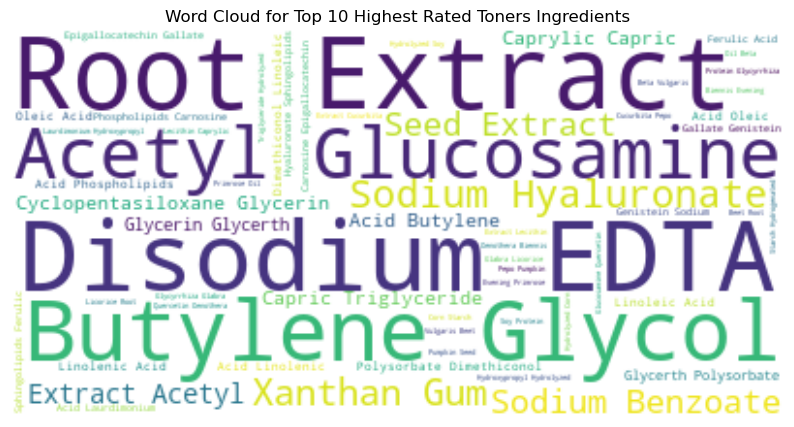

In [107]:
# Generate a WordCloud for the top 10 toners
top_10_toners_names = top_10_toners['product_name'].tolist()
wordcloud_data = toner_rating[toner_rating['product_name'].isin(top_10_toners_names)]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Aqua', 'Water'])

# Generate a WordCloud and plot the results
toner_text = " ".join(ingredient for ingredient in wordcloud_data['ingredients'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Top 10 Highest Rated Toners Ingredients')
plt.show()

Highlights

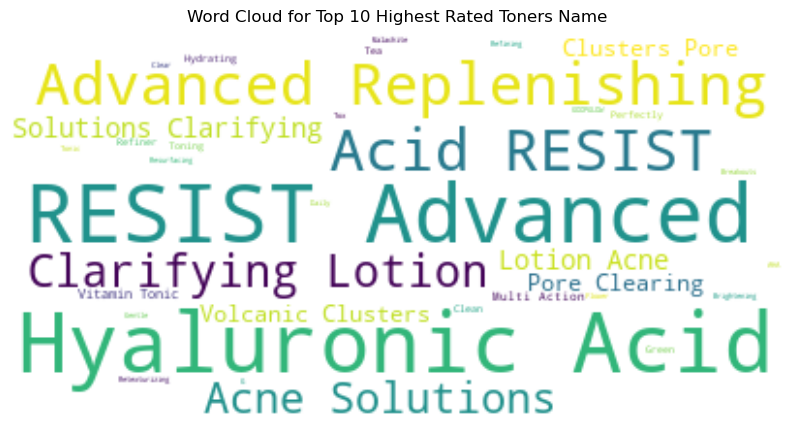

In [108]:
# Generate a WordCloud for the top 10 toners
top_10_toners_names = top_10_toners['product_name'].tolist()
wordcloud_data = toner_rating[toner_rating['product_name'].isin(top_10_toners_names)]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Toner', 'Water'])

# Generate a WordCloud and plot the results
toner_text = " ".join(name for name in wordcloud_data['product_name'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Top 10 Highest Rated Toners Name')
plt.show()

# Top 10 Lowest Rated Toners for Dry Skin

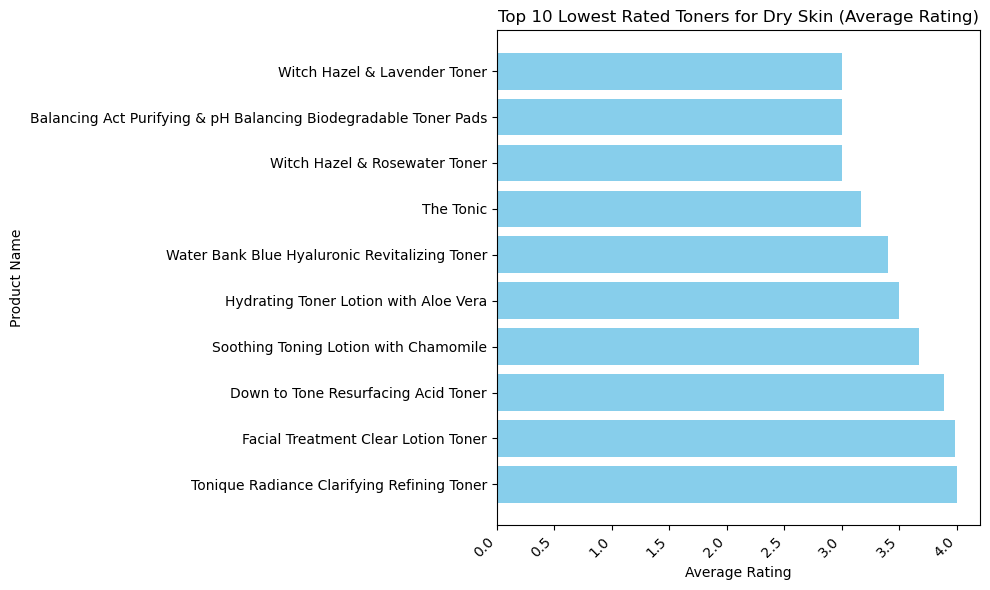

In [109]:
# Select relevant columns
toner_rating = product_reviews[['product_name', 'rating', 'skin_type']]

# Filter data for toner and oily skin only using str.contains
toner_rating = product_reviews[
    (product_reviews['tertiary_category'].str.contains('Toner', case=False)) &
    (product_reviews['skin_type'].str.contains('Dry', case=False))
]

# Group by product and calculate the average (mean) of ratings
product_avg_ratings = toner_rating.groupby('product_name')['rating'].mean().reset_index()

# Sort by the average rating descending
product_avg_ratings = product_avg_ratings.sort_values(by='rating', ascending=True)

# Select top 10 best-rated toners
top_10_toners = product_avg_ratings.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_toners['product_name'], top_10_toners['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.title('Top 10 Lowest Rated Toners for Dry Skin (Average Rating)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()

Ingredients

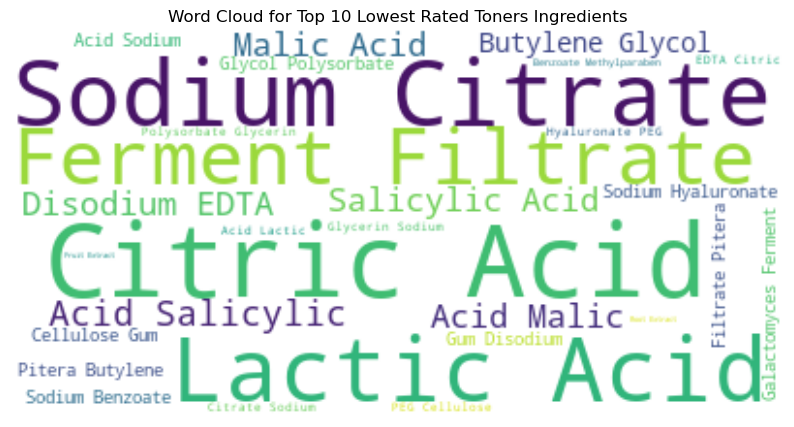

In [110]:
# Generate a WordCloud for the top 10 toners
top_10_toners_names = top_10_toners['product_name'].tolist()
wordcloud_data = toner_rating[toner_rating['product_name'].isin(top_10_toners_names)]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Aqua', 'Water'])

# Generate a WordCloud and plot the results
toner_text = " ".join(ingredient for ingredient in wordcloud_data['ingredients'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Top 10 Lowest Rated Toners Ingredients')
plt.show()

Highlights

C:\Users\Quebec online school\AppData\Local\Temp\ipykernel_27700\1735424168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcloud_data['highlights'] = wordcloud_data['highlights'].astype(str)


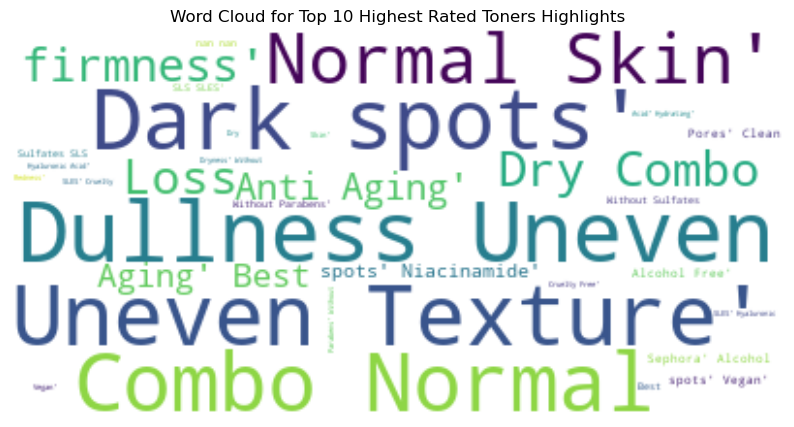

In [111]:
# Generate a WordCloud for the top 10 toners
top_10_toners_names = top_10_toners['product_name'].tolist()
wordcloud_data = toner_rating[toner_rating['product_name'].isin(top_10_toners_names)]

# Convert 'highlights' column to strings
wordcloud_data['highlights'] = wordcloud_data['highlights'].astype(str)

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Good', 'Skin'])

# Generate a WordCloud and plot the results
toner_text = " ".join(highlight for highlight in wordcloud_data['highlights'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Top 10 Highest Rated Toners Highlights')
plt.show()

# Chi-Square Test 


In [142]:

# Filter data for Products with AHA or BHA in the product name
selected_products = product_reviews[
    (product_reviews['product_name'].str.contains('AHA|BHA', case=False, na=False))
]

# Filter further for skin types 'oily' or 'dry'
selected_products = selected_products[
    (selected_products['skin_type'] == 'combination') | (selected_products['skin_type'] == 'normal')|(selected_products['skin_type'] == 'dry') | (selected_products['skin_type'] == 'oily')
]

# Create a contingency table
contingency_table = pd.crosstab(selected_products['skin_type'], selected_products['rating'])

# Perform Chi-Square Test
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Value: 23.99881340443213
P-value: 0.020348589717839108
Degrees of Freedom: 12
Expected Frequencies:
[[ 1722.80075381  1300.6349152   1772.29998287  4601.72143224
  20491.54291588]
 [  493.39805456   372.49271886   507.57428664  1317.9007481
   5868.63419184]
 [  366.18666362   276.45400034   376.70787886   978.11021644
   4355.54124074]
 [  445.61452801   336.4183656    458.41785164  1190.26760322
   5300.28165153]]


# Sentiment AnalysisCombination Chart


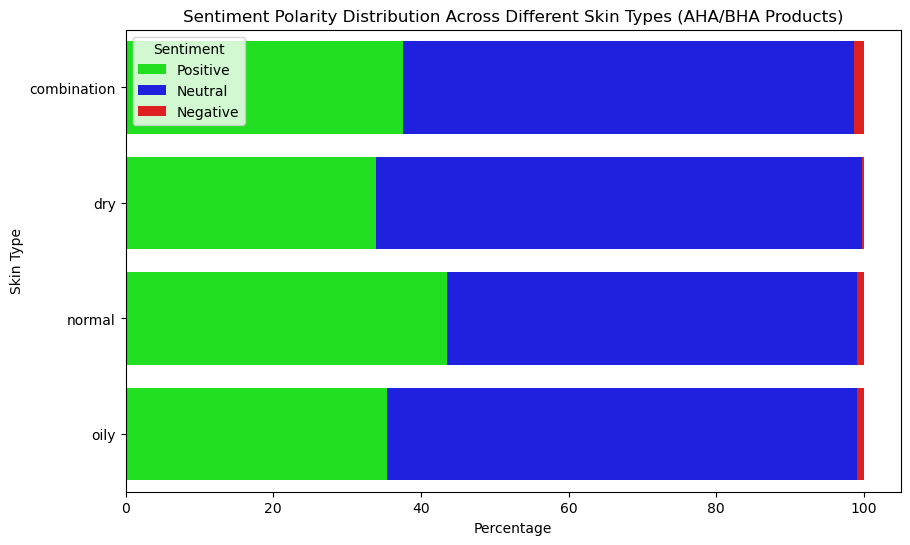

In [144]:
# Function to get sentiment category
def get_sentiment_category(polarity):
    if polarity > 0.25:
        return 'Positive'
    elif polarity < -0.25:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get sentiment polarity and category
def get_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    category = get_sentiment_category(polarity)
    return polarity, category

# Apply the function to the 'f_reviews' DataFrame and create a copy
f_reviews['sentiment_polarity'], f_reviews['sentiment_category'] = zip(*f_reviews['review_text'].apply(get_sentiment))

# Filter data for products with AHA/BHA in the title
aha_bha_products = f_reviews[f_reviews['product_name'].str.contains('AHA/BHA', case=False)]

# Filter out rows with null skin_type
aha_bha_products = aha_bha_products.dropna(subset=['skin_type'])

# Create a DataFrame for sentiment distribution
sentiment_distribution = aha_bha_products.groupby(['skin_type', 'sentiment_category']).size().unstack(fill_value=0).reset_index()

# Calculate the total number of reviews for each skin type
sentiment_distribution['total_reviews'] = sentiment_distribution[['Negative', 'Neutral', 'Positive']].sum(axis=1)

# Convert the counts to percentages
sentiment_distribution_percentage = sentiment_distribution[['Negative', 'Neutral', 'Positive']].div(sentiment_distribution['total_reviews'], axis=0) * 100

# Add 'skin_type' as a regular column
sentiment_distribution_percentage['skin_type'] = sentiment_distribution['skin_type']

# Create a 100% stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y='skin_type', x='Positive', data=sentiment_distribution_percentage, color='lime', label='Positive')
sns.barplot(y='skin_type', x='Neutral', data=sentiment_distribution_percentage, color='blue', label='Neutral', left=sentiment_distribution_percentage['Positive'])
sns.barplot(y='skin_type', x='Negative', data=sentiment_distribution_percentage, color='red', label='Negative',
            left=sentiment_distribution_percentage[['Positive', 'Neutral']].sum(axis=1))

plt.xlabel('Percentage')
plt.ylabel('Skin Type')
plt.title('Sentiment Polarity Distribution Across Different Skin Types (AHA/BHA Products)')
plt.legend(title='Sentiment')
plt.show()


In [139]:
print(sentiment_distribution_percentage.index)

RangeIndex(start=0, stop=4, step=1)


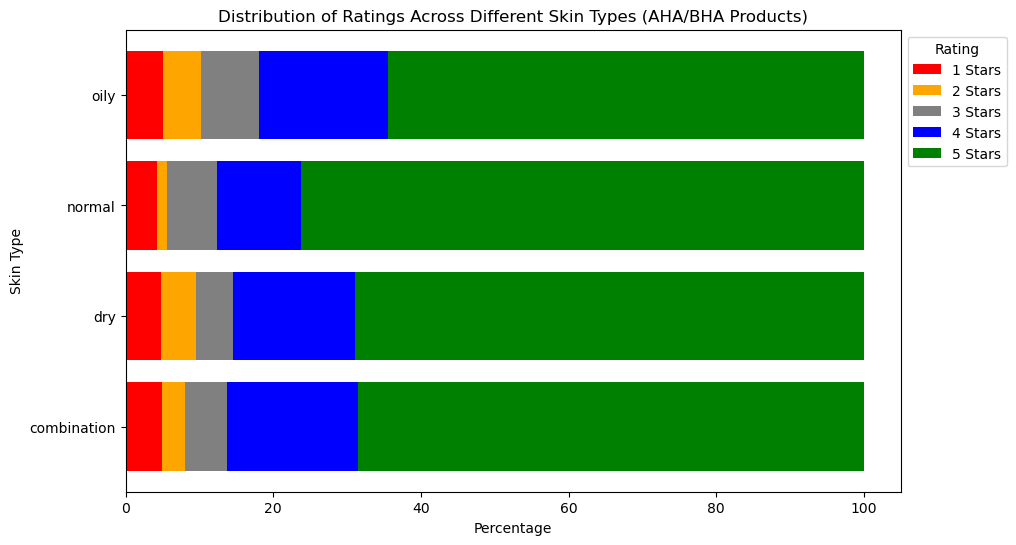

In [145]:

# Filter data for products with AHA/BHA in the title
aha_bha_products = f_reviews[f_reviews['product_name'].str.contains('AHA/BHA', case=False)]

# Drop rows with null skin_type and rating
aha_bha_products = aha_bha_products.dropna(subset=['skin_type', 'rating'])

# Convert 'rating' column to numeric type
aha_bha_products['rating'] = pd.to_numeric(aha_bha_products['rating'], errors='coerce')


# Create a DataFrame with counts of ratings per skin type
rating_counts = aha_bha_products.groupby(['skin_type', 'rating']).size().unstack(fill_value=0).reset_index()


# Normalize the counts to percentages
rating_percentage = rating_counts.set_index('skin_type').div(rating_counts.set_index('skin_type').sum(axis=1), axis=0) * 100

# Reorder the columns to match the color scheme
rating_percentage = rating_percentage[[1, 2, 3, 4, 5]].reset_index()

# Reorder the columns to match the color scheme
rating_percentage = pd.concat([rating_percentage['skin_type'], rating_percentage.drop(columns='skin_type')], axis=1)

# Define custom colors for each rating
custom_colors = ['red', 'orange', 'grey', 'blue', 'green']

# Create a horizontal 100% stacked bar chart with custom colors
plt.figure(figsize=(10, 6))
bottom = None

for rating, color in zip(range(1, 6), custom_colors):
    plt.barh(rating_percentage['skin_type'], rating_percentage[rating], label=f'{rating} Stars', color=color, left=bottom)
    if bottom is None:
        bottom = rating_percentage[rating].values
    else:
        bottom += rating_percentage[rating].values
plt.xlabel('Percentage')
plt.ylabel('Skin Type')
plt.title('Distribution of Ratings Across Different Skin Types (AHA/BHA Products)')
plt.legend(title='Rating', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



In [121]:
print(sentiment_distribution)

sentiment_category    skin_type  Negative  Neutral  Positive  total_reviews
0                   combination        28     1280       786           2094
1                           dry         1      290       149            440
2                        normal         3      197       154            354
3                          oily         7      466       259            732


In [146]:
# Define specific brand names and skin type
selected_brands = ['LANEIGE', 'Glow Recipe', 'Youth To The People', 'Dr. Jart+','Tatcha', 'Fenty Skin', 'Gisou']
selected_skin_type = 'Dry'

# Filter data for selected brand names and skin type
specific_data = all_skin_types[(all_skin_types['brand_name'].isin(selected_brands)) & (all_skin_types['skin_type'] == selected_skin_type)]

# Create a scatter plot for sentiment polarity distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(x='brand_name', y='sentiment_polarity', data=specific_data, color='blue')  # Removed 'hue' and 'palette'
plt.xlabel('Product Name')
plt.ylabel('Sentiment Polarity')
plt.title(f'Sentiment Polarity vs. Brand Name for Dry Skin Type')
plt.xticks(rotation=45, ha='right')

# Set legend labels manually
plt.legend(labels=[selected_skin_type], title='Skin Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


ValueError: Could not interpret value `sentiment_polarity` for parameter `y`

<Figure size 1200x800 with 0 Axes>

In [ ]:
from scipy.stats import f_oneway

# Example: Perform ANOVA test for sentiment across different skin types
skin_type_groups = [all_skin_types[all_skin_types['skin_type'] == st]['sentiment_polarity'] for st in skin_type]

# Perform ANOVA
f_statistic, p_value = f_oneway(*skin_type_groups)

print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There are significant differences in sentiment across different skin types.')
else:
    print('There are no significant differences in sentiment across different skin types.')


In [147]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example: Perform Tukey-Kramer post hoc test
tukey_results = pairwise_tukeyhsd(endog=all_skin_types['sentiment_polarity'], groups=all_skin_types['skin_type'], alpha=0.05)

# Print the summary of the test
print(tukey_results.summary())


KeyError: 'sentiment_polarity'

# T-Test

# ANOVA

# Specific Authors

In [150]:
# Group by author_id and calculate the sum of reviews
top_authors = product_reviews.groupby('author_id')['review_title'].count().reset_index()

# Sort by the sum of reviews in descending order
top_authors = top_authors.sort_values(by='review_title', ascending=False)

# Select top 10 authors
top_10_authors = top_authors.head(25)

# Display the top 10 authors
print(top_10_authors)


          author_id  review_title
151026   1930716686           155
210428   2330399812           149
17131   10690040573           131
433310   7375781965           126
192391   2231701489           112
102773   1492711942           107
376962   6091659724           103
368773   5953458355           102
62749   12750259168           102
497815   9769481082            97
72187    1314992825            96
267694  27763569314            96
236261  24998050674            95
40296   11673121444            93
262537   2724796408            93
114198   1568774266            93
332772   5399034659            91
274528   2841543991            91
262818  27272165842            90
243662  25452917574            90
145484   1864233002            90
110740   1546870362            89
477750   8941674728            89
51294    1218444012            88
248065   2577925072            88


# Abby - Dry Skin 

In [161]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Print all information related to the author_id
print(author_reviews.columns)


Index(['author_id', 'rating', 'is_recommended', 'submission_time',
       'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type',
       'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd',
       'reviews', 'ingredients', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category'],
      dtype='object')


In [162]:
# Calculate the average rating for each brand
average_ratings_by_brand = author_reviews.groupby('brand_name')['rating'].mean()

# Sort the distinct brands based on the highest average rating
sorted_brands = average_ratings_by_brand.sort_values(ascending=False)

# Filter brands with ratings between 4 and 5
filtered_brands = sorted_brands[(sorted_brands >= 4) & (sorted_brands <= 5)]

# Print the distinct brands with ratings between 4 and 5
print("Distinct Brands for Author A with Ratings between 4 and 5:")
print(filtered_brands)

Distinct Brands for Author A with Ratings between 4 and 5:
brand_name
KORRES                       5.000000
Fenty Skin                   5.000000
Skinfix                      5.000000
COOLA                        5.000000
Murad                        5.000000
La Mer                       5.000000
L'Occitane                   5.000000
Kiehl's Since 1851           5.000000
Glow Recipe                  5.000000
GUERLAIN                     5.000000
Dr. Dennis Gross Skincare    5.000000
Dr. Jart+                    5.000000
Lancôme                      4.666667
Supergoop!                   4.600000
fresh                        4.571429
belif                        4.500000
Tatcha                       4.500000
Shiseido                     4.500000
Tata Harper                  4.461538
Estée Lauder                 4.400000
Shani Darden Skin Care       4.333333
LANEIGE                      4.333333
Drunk Elephant               4.250000
IT Cosmetics                 4.250000
Dermalogica       

In [163]:
# Filter brands with ratings between 4 and 5
filtered_brands = sorted_brands[(sorted_brands >= 2) & (sorted_brands < 4)]

# Print the distinct brands with ratings between 4 and 5
print("Distinct Brands for Author A with Ratings between 4 and 5:")
print(filtered_brands)

Distinct Brands for Author A with Ratings between 4 and 5:
brand_name
CLINIQUE             3.888889
Origins              3.800000
Clarins              3.750000
Sulwhasoo            3.666667
Farmacy              3.500000
Kate Somerville      3.400000
Augustinus Bader     3.000000
Dior                 3.000000
Summer Fridays       3.000000
Sunday Riley         3.000000
Biossance            3.000000
First Aid Beauty     3.000000
SK-II                2.000000
Herbivore            2.000000
Charlotte Tilbury    2.000000
Name: rating, dtype: float64


In [164]:
# Group by tertiary_category and calculate the sum of reviews
category_reviews_count = author_reviews.groupby('tertiary_category')['rating'].count().reset_index()

# Sort by the sum of reviews in descending order
top_categories = category_reviews_count.sort_values(by='rating', ascending=False)

# Select top 3 categories
top_3_categories = top_categories.head(3)

# Display the top 3 categories
print(top_3_categories)


        tertiary_category  rating
13           Moisturizers      46
6             Face Serums      22
8   Face Wash & Cleansers      17


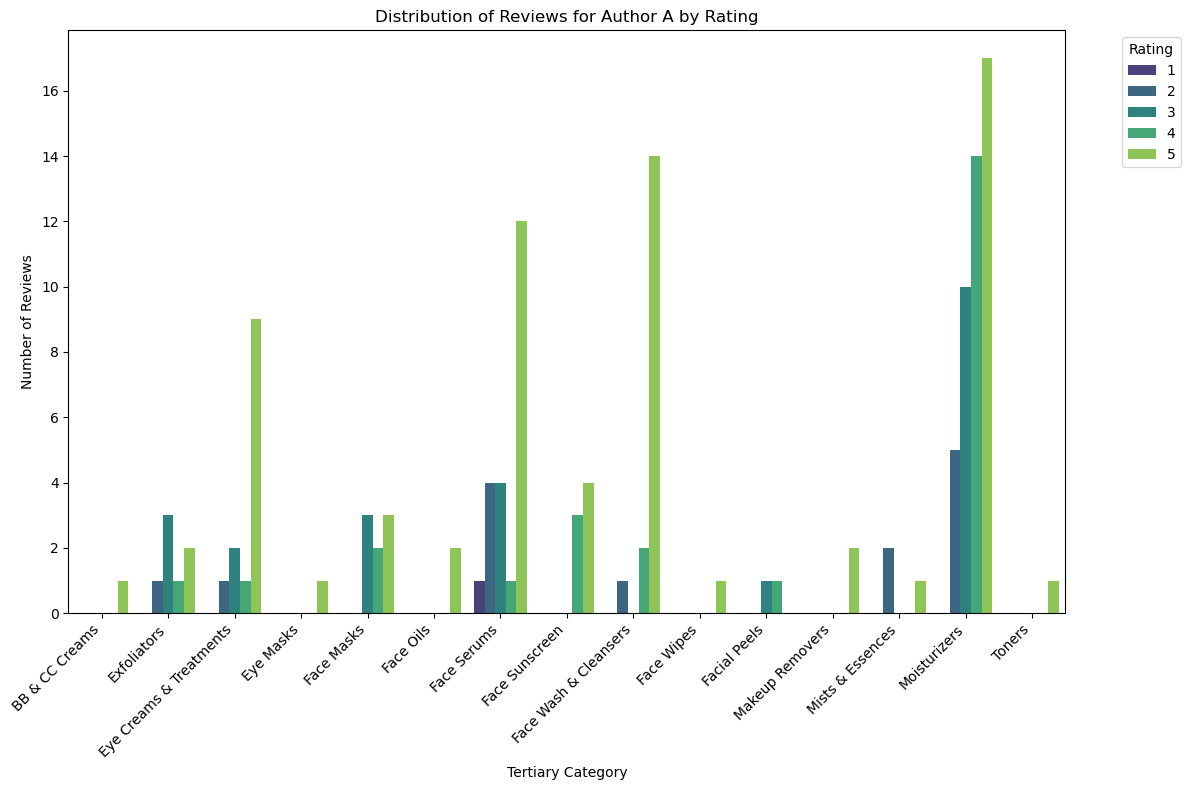

In [165]:
# Sort the reviews by tertiary_category and rating
sorted_reviews = author_reviews.sort_values(by=['tertiary_category', 'rating'])

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='tertiary_category', hue='rating', data=sorted_reviews, palette='viridis')

# Set labels and title
plt.xlabel('Tertiary Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews for Author A by Rating')

# Show the legend
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [166]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Filter further for the specific tertiary_category
author_reviews_face_wash = author_reviews[author_reviews['tertiary_category'] == 'Face Wash & Cleansers']


# Filter for ratings 4 or 5
author_reviews_face_wash_high_ratings = author_reviews_face_wash[author_reviews_face_wash['rating'].isin([4, 5])]

# Print all information related to the author_id, tertiary_category, and high ratings
print(author_reviews_face_wash_high_ratings)


          author_id  rating  is_recommended submission_time  \
16743    1930716686       5            True      2020-10-05   
156959   1930716686       5            True      2022-07-24   
629721   1930716686       4            True      2018-05-20   
734434   1930716686       5            True      2021-05-02   
751879   1930716686       5            True      2021-02-08   
759577   1930716686       5            True      2021-06-04   
766459   1930716686       4            True      2018-11-03   
804797   1930716686       5            True      2021-05-05   
894678   1930716686       5            True      2021-06-04   
901245   1930716686       5            True      2022-03-12   
978779   1930716686       5            True      2019-07-03   
978780   1930716686       5            True      2019-06-29   
1028977  1930716686       5            True      2019-06-20   
1062909  1930716686       5            True      2020-05-17   
1066841  1930716686       5            True      2019-0

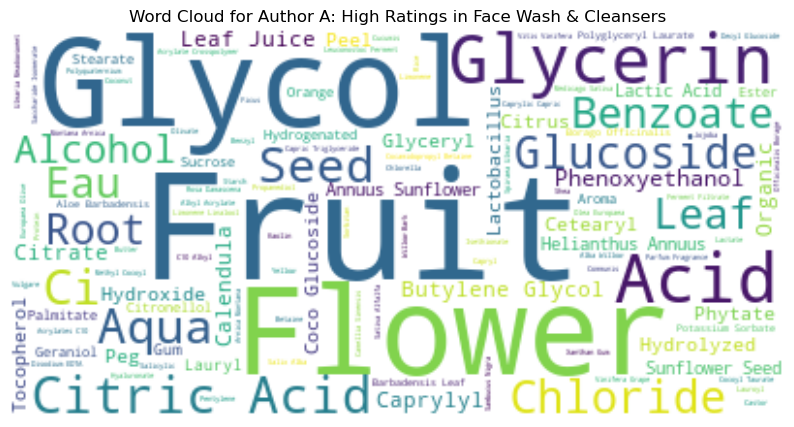

In [167]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Filter further for the specific tertiary_category
author_reviews_face_wash = author_reviews[author_reviews['tertiary_category'] == 'Face Wash & Cleansers']

# Filter for ratings 4 or 5
author_reviews_face_wash_high_ratings = author_reviews_face_wash[author_reviews_face_wash['rating'].isin([4, 5])]

# Generate a WordCloud for the filtered reviews
wordcloud_data = author_reviews_face_wash_high_ratings[['product_name', 'ingredients']]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Extract', 'Water', 'Sodium', 'Oil'])

# Generate a WordCloud and plot the results
toner_text = " ".join(ingredient for ingredient in wordcloud_data['ingredients'].astype(str))
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Author A: High Ratings in Face Wash & Cleansers')
plt.show()


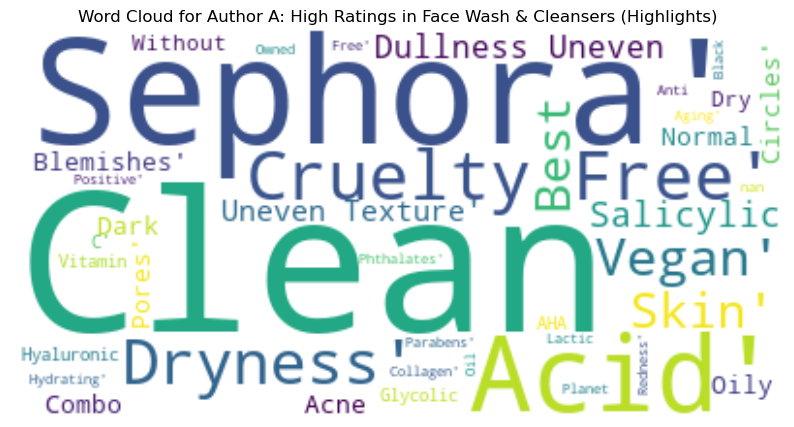

In [168]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Filter further for the specific tertiary_category
author_reviews_face_wash = author_reviews[author_reviews['tertiary_category'] == 'Face Wash & Cleansers']

# Filter for ratings 4 or 5
author_reviews_face_wash_high_ratings = author_reviews_face_wash[author_reviews_face_wash['rating'].isin([4, 5])]

# Generate a WordCloud for the filtered reviews based on "highlights"
wordcloud_data = author_reviews_face_wash_high_ratings[['product_name', 'highlights']]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Good', 'skin', 'sephora'])

# Generate a WordCloud and plot the results
toner_text = " ".join(highlight for highlight in wordcloud_data['highlights'].astype(str))
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Author A: High Ratings in Face Wash & Cleansers (Highlights)')
plt.show()

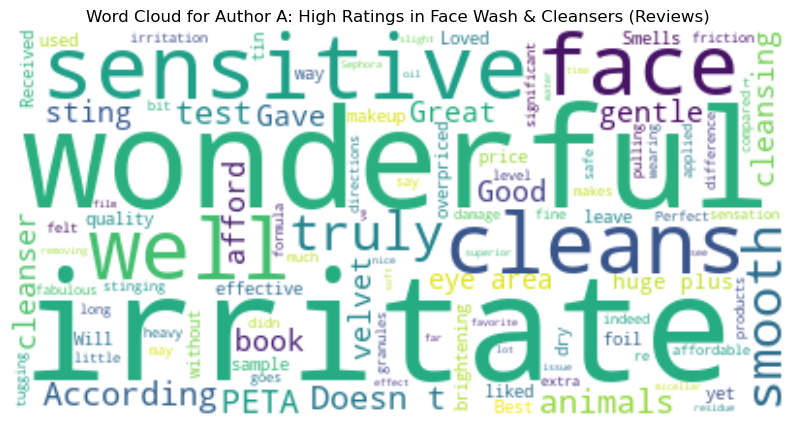

In [169]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Filter further for the specific tertiary_category
author_reviews_face_wash = author_reviews[author_reviews['tertiary_category'] == 'Face Wash & Cleansers']

# Filter for ratings 4 or 5
author_reviews_face_wash_high_ratings = author_reviews_face_wash[author_reviews_face_wash['rating'].isin([4, 5])]

# Generate a WordCloud for the filtered reviews based on "review_text"
wordcloud_data = author_reviews_face_wash_high_ratings[['product_name', 'review_text']]

# Create a stopword list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Eyes', 'Skin', 'product', 'use'])

# Generate a WordCloud and plot the results
toner_text = " ".join(review_text for review_text in wordcloud_data['review_text'].astype(str))
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(toner_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Author A: High Ratings in Face Wash & Cleansers (Reviews)')
plt.show()


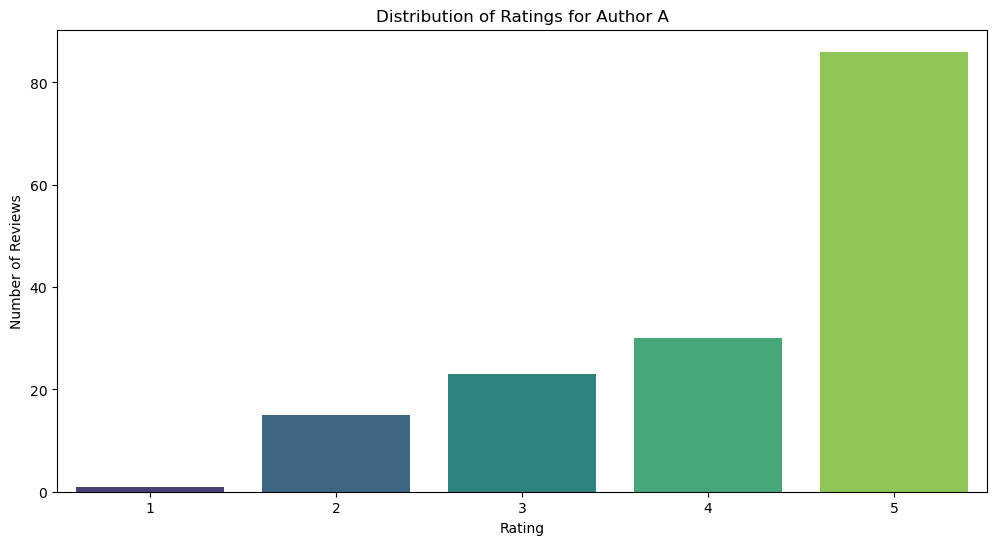

In [170]:
# Set the author_id you want to explore
selected_author_id = '1930716686'

# Filter data for the specific author_id
author_data = product_reviews[product_reviews['author_id'] == selected_author_id]

# Explore the distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=author_data, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings for Author A')
plt.show()

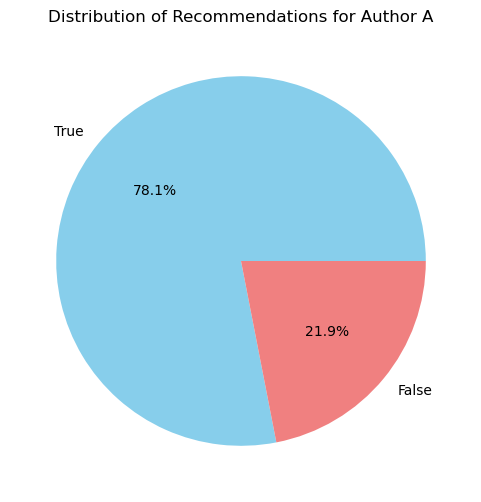

In [171]:
# Count the number of recommended and not recommended reviews
recommendation_counts = author_data['is_recommended'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Recommendations for Author A')
plt.show()

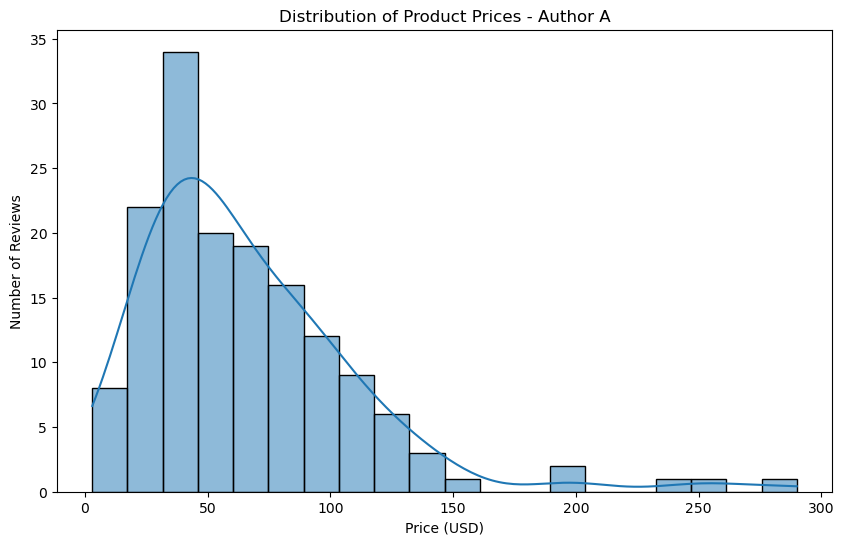

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(author_data['price_usd'], bins=20, kde=True)
plt.xlabel('Price (USD)')
plt.ylabel('Number of Reviews')
plt.title(f'Distribution of Product Prices - Author A')
plt.show()


In [173]:
# Group by tertiary_category and calculate the lowest, highest, and mean prices
category_price_stats = author_data.groupby('tertiary_category')['price_usd'].agg(['min', 'max', 'mean']).reset_index()

# Rename the columns for clarity
category_price_stats.columns = ['tertiary_category', 'lowest_price', 'highest_price', 'mean_price']

# Display the result
print(category_price_stats)


          tertiary_category  lowest_price  highest_price  mean_price
0            BB & CC Creams          52.0           52.0   52.000000
1               Exfoliators          14.0           98.0   50.428571
2   Eye Creams & Treatments          37.0          145.0   74.769231
3                 Eye Masks          42.0           42.0   42.000000
4                Face Masks          32.0          200.0   89.875000
5                 Face Oils          49.0          145.0   97.000000
6               Face Serums          50.0          195.0   95.090909
7            Face Sunscreen          28.0           75.0   44.714286
8     Face Wash & Cleansers          24.0           88.0   49.588235
9                Face Wipes           3.0            3.0    3.000000
10             Facial Peels          60.0           98.0   79.000000
11          Makeup Removers          13.0           14.0   13.500000
12         Mists & Essences          76.0          245.0  140.000000
13             Moisturizers       

C:\Users\Quebec online school\AppData\Local\Temp\ipykernel_27700\1595389667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['price_group'] = pd.cut(author_data['price_usd'], bins=price_bins, right=False)


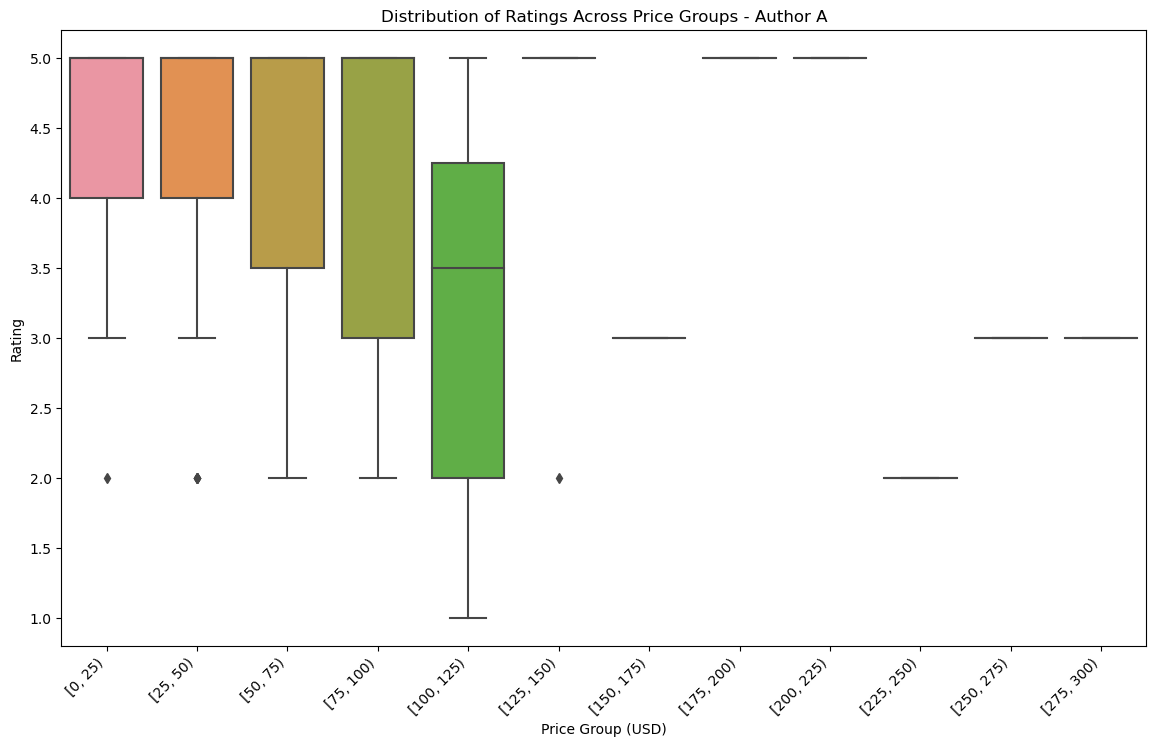

In [174]:
# Create price groups
price_bins = list(range(0, int(author_data['price_usd'].max()) + 25, 25))

# Assign each row to a price group
author_data['price_group'] = pd.cut(author_data['price_usd'], bins=price_bins, right=False)

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='price_group', y='rating', data=author_data)

plt.xlabel('Price Group (USD)')
plt.ylabel('Rating')
plt.title(f'Distribution of Ratings Across Price Groups - Author A')
plt.xticks(rotation=45, ha='right')

plt.show()

In [176]:
# Convert 'submission_time' to datetime format
author_data['submission_time'] = pd.to_datetime(author_data['submission_time'])

# Set 'submission_time' as the index
author_data.set_index('submission_time', inplace=True)

# Resample the data by year and count the number of reviews
yearly_reviews = author_data['rating'].resample('Y').count()

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=yearly_reviews.index, y=yearly_reviews.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title(f'Number of Reviews Over Years - Author A')
plt.xticks(rotation=45, ha='right')

plt.show()



KeyError: 'submission_time'

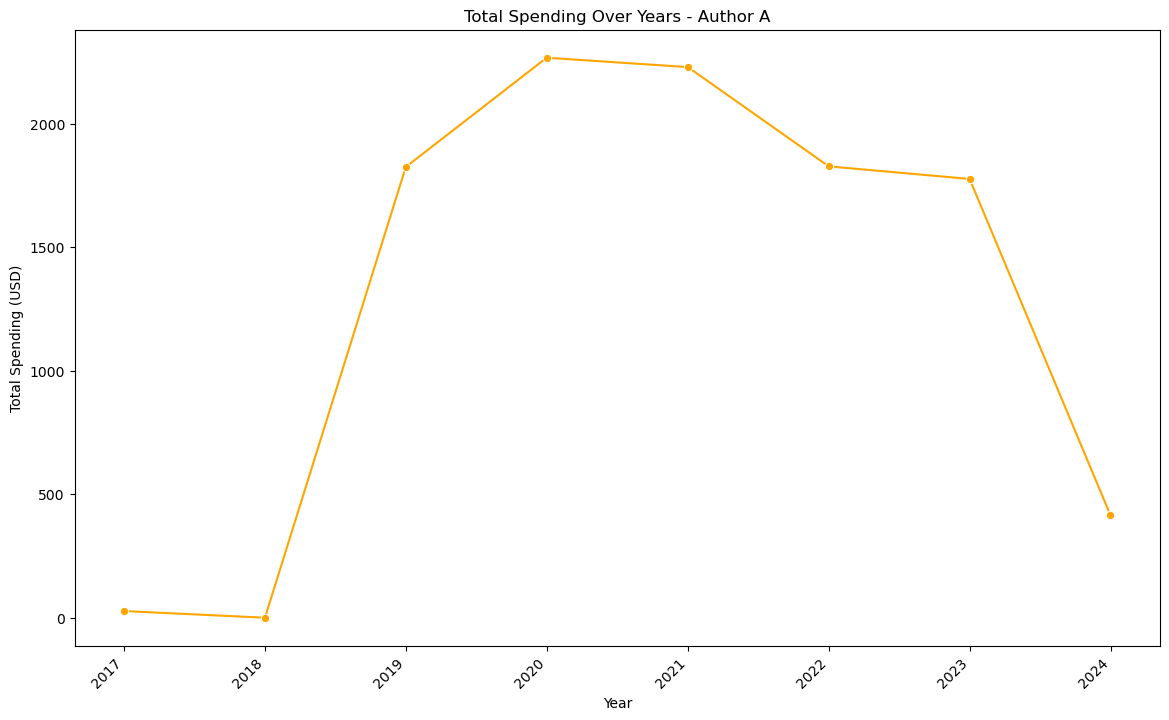

In [177]:
# Resample the 'price_usd' column by year and calculate the sum
yearly_spending = author_data['price_usd'].resample('Y').sum()

# Create a line plot for yearly spending
plt.figure(figsize=(14, 8))
sns.lineplot(x=yearly_spending.index, y=yearly_spending.values, marker='o', color='orange')

plt.xlabel('Year')
plt.ylabel('Total Spending (USD)')
plt.title(f'Total Spending Over Years - Author A')
plt.xticks(rotation=45, ha='right')

plt.show()

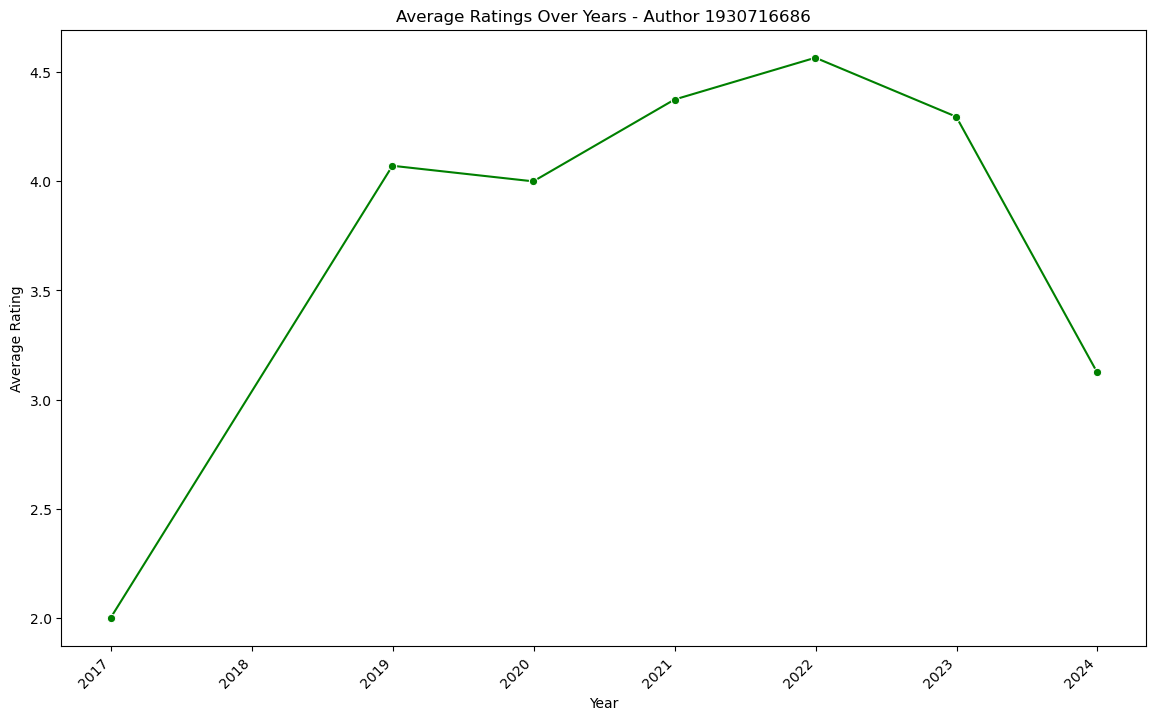

In [159]:
# Resample the 'rating' column by year and calculate the mean
average_ratings = author_data['rating'].resample('Y').mean()

# Create a line plot for average ratings
plt.figure(figsize=(14, 8))
sns.lineplot(x=average_ratings.index, y=average_ratings.values, marker='o', color='green')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title(f'Average Ratings Over Years - Author {selected_author_id}')
plt.xticks(rotation=45, ha='right')

plt.show()

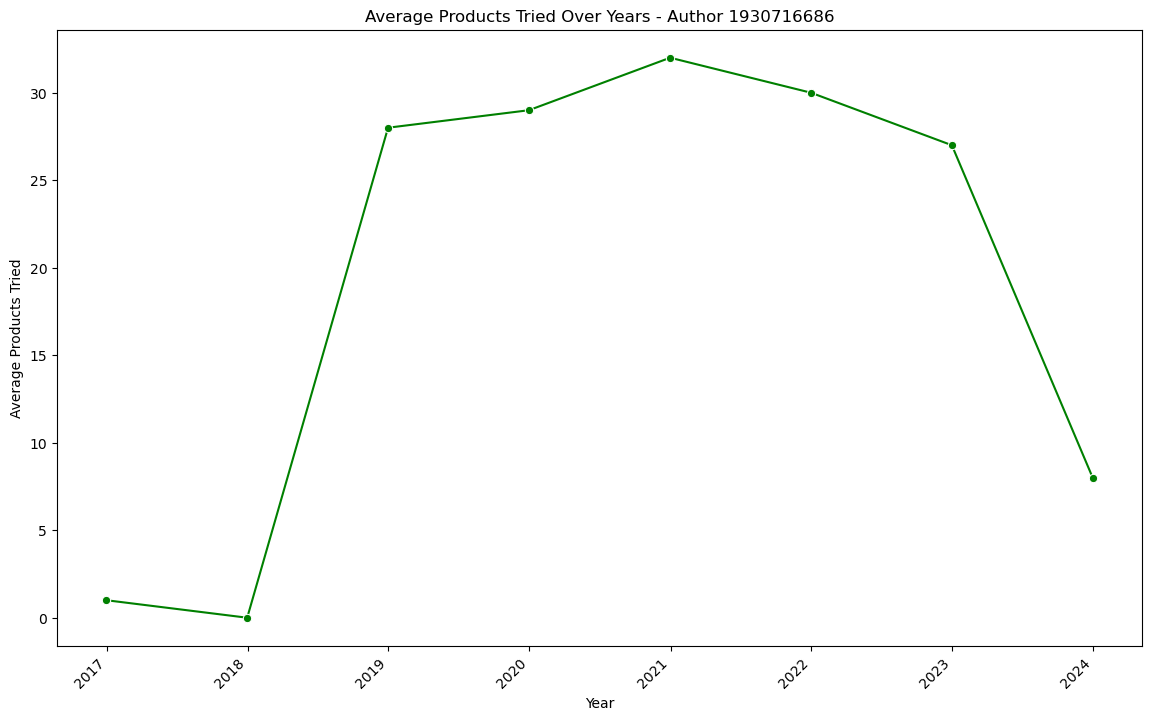

In [160]:
# Resample the 'rating' column by year and calculate the mean
average_ratings = author_data['product_id'].resample('Y').count()

# Create a line plot for average ratings
plt.figure(figsize=(14, 8))
sns.lineplot(x=average_ratings.index, y=average_ratings.values, marker='o', color='green')

plt.xlabel('Year')
plt.ylabel('Average Products Tried')
plt.title(f'Average Products Tried Over Years - Author {selected_author_id}')
plt.xticks(rotation=45, ha='right')

plt.show()

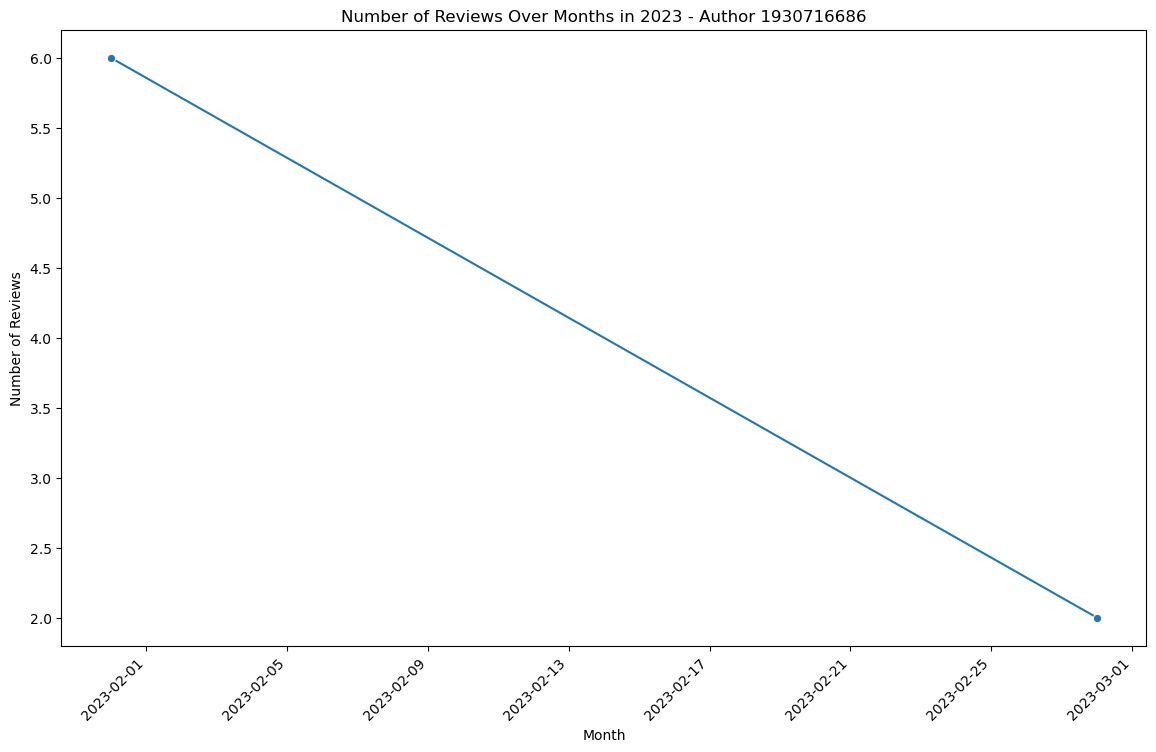

In [161]:
# Filter data for the year 2023
author_data_2023 = author_data.loc['2023']

# Resample the data by month and count the number of reviews
monthly_reviews_2023 = author_data_2023['rating'].resample('M').count()

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_reviews_2023.index, y=monthly_reviews_2023.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title(f'Number of Reviews Over Months in 2023 - Author {selected_author_id}')
plt.xticks(rotation=45, ha='right')

plt.show()

In [162]:
# Filter data for the year 2023
author_data_2023 = author_data.loc['2023']

# Print all information related to the author in 2023
print(author_data_2023)

                  author_id  rating  is_recommended  \
submission_time                                       
2023-02-11       1930716686       2           False   
2023-01-16       1930716686       3           False   
2023-01-16       1930716686       3           False   
2023-01-08       1930716686       4            True   
2023-01-16       1930716686       4            True   
2023-01-16       1930716686       4            True   
2023-01-22       1930716686       2           False   
2023-02-05       1930716686       3           False   

                                                       review_text  \
submission_time                                                      
2023-02-11       Hated the scent. Didn’t really moisturize my f...   
2023-01-16       Disliked scent.  Product is a bit sticky and I...   
2023-01-16       Disliked scent.  Product is a bit sticky and I...   
2023-01-08       Very lightweight product.  Unscented.  Didn’t ...   
2023-01-16       Not greasy, 

In [210]:
# Partial product name to search for
partial_product_name = 'Hydra Vizor Invisible Moisturizer Broad Spectrum'

# Filter data for products containing the partial name
target_products = product_reviews[product_reviews['product_name'].str.contains(partial_product_name, case=False)]

# Display product IDs and corresponding product names
print(target_products[['product_id', 'product_name']])




        product_id                                       product_name
736748     P467249  Hydra Vizor Invisible Moisturizer Broad Spectr...
736749     P467249  Hydra Vizor Invisible Moisturizer Broad Spectr...
736750     P467249  Hydra Vizor Invisible Moisturizer Broad Spectr...
736751     P467249  Hydra Vizor Invisible Moisturizer Broad Spectr...
736752     P467249  Hydra Vizor Invisible Moisturizer Broad Spectr...
...            ...                                                ...
1091859    P480166  Mini Hydra Vizor Invisible Moisturizer Broad S...
1091860    P480166  Mini Hydra Vizor Invisible Moisturizer Broad S...
1091861    P480166  Mini Hydra Vizor Invisible Moisturizer Broad S...
1091862    P480166  Mini Hydra Vizor Invisible Moisturizer Broad S...
1091863    P480166  Mini Hydra Vizor Invisible Moisturizer Broad S...

[837 rows x 2 columns]


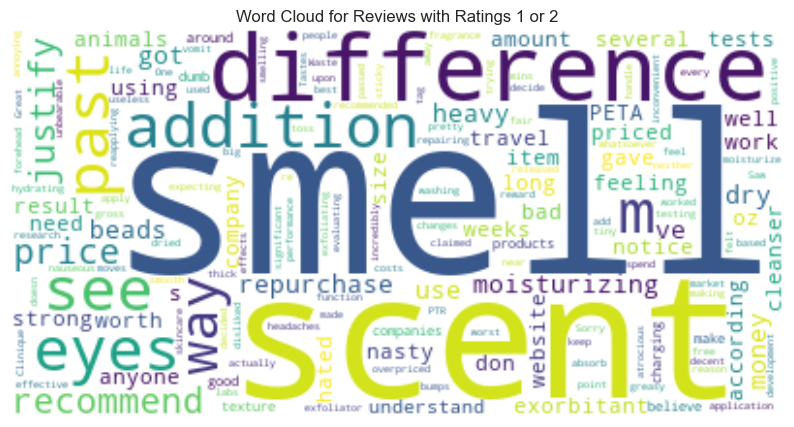

In [203]:
# Filter data for the specific conditions
low_ratings_data = author_reviews[author_reviews['rating'].isin([1, 2])]

# Concatenate the review text for low-rated reviews
low_ratings_text = ' '.join(review_text for review_text in low_ratings_data['review_text'].astype(str))

# Create a WordCloud for common words in low-rated reviews
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['product','skin', 'much','sure', 't', 'didn', 'really', 'face', 'couldn', 'terrible'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(low_ratings_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews with Ratings 1 or 2')
plt.show()

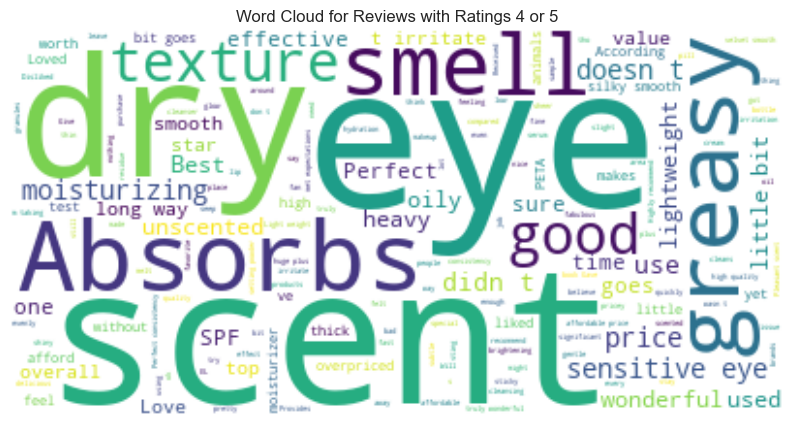

In [223]:
# Filter data for the specific conditions
high_ratings_data = author_reviews[author_reviews['rating'].isin([4, 5])]

# Concatenate the review text for low-rated reviews
high_ratings_text = ' '.join(review_text for review_text in high_ratings_data['review_text'].astype(str))

# Create a WordCloud for common words in low-rated reviews
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['well','skin', 'much','make', 'great', 'product', 'really', 'face', 'couldn', 'terrible'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(high_ratings_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews with Ratings 4 or 5')
plt.show()


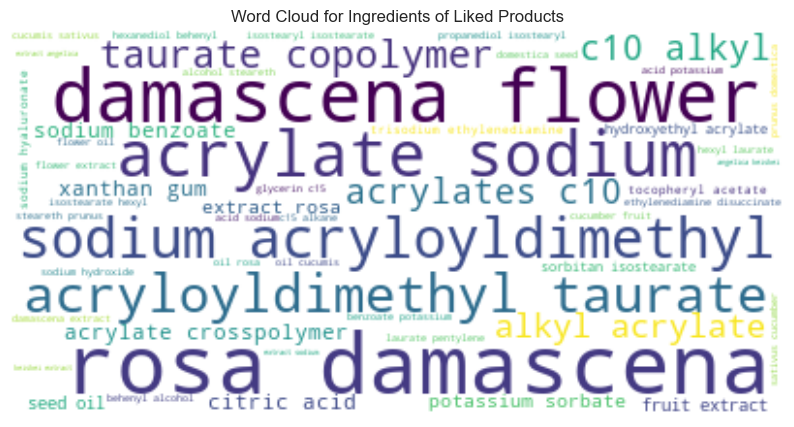

In [218]:
# List of product IDs to search for
target_product_ids = ['P471237', 'P463036', 'P397890', 'P467249']

# Filter data for the target product IDs
target_products = product_reviews[product_reviews['product_id'].isin(target_product_ids)]

# Concatenate ingredients from all products
all_ingredients = ' '.join(target_products['ingredients'].astype(str)).lower().replace(',', '')

# Create a stopword list if needed
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['water', 'aqua','eau','butylene', 'glycol' ])
# Generate a WordCloud and plot the results
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Ingredients of Liked Products')
plt.show()

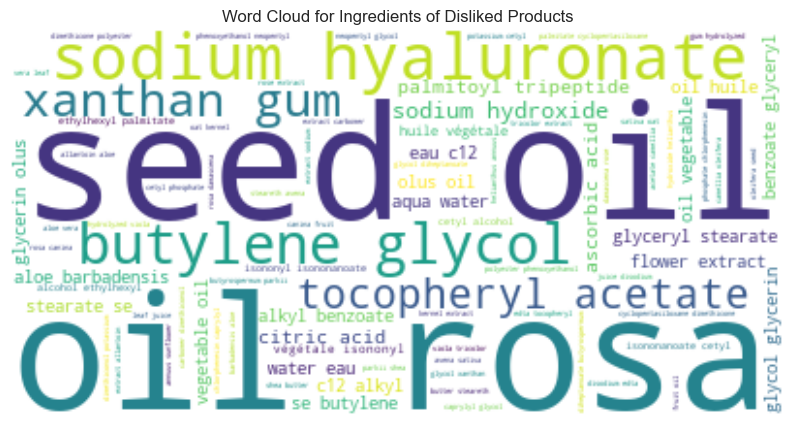

In [217]:
# List of product IDs to search for
target_product_ids = ['P433520', 'P466153', 'P479125', 'P474325']

# Filter data for the target product IDs
target_products = product_reviews[product_reviews['product_id'].isin(target_product_ids)]

# Concatenate ingredients from all products
all_ingredients = ' '.join(target_products['ingredients'].astype(str)).lower().replace(',', '')

# Create a stopword list if needed
custom_stopwords = set(STOPWORDS)

# Generate a WordCloud and plot the results
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Ingredients of Disliked Products')
plt.show()

In [227]:
# Filter data for the specific author_id
author_reviews = product_reviews[product_reviews['author_id'] == '1930716686']

# Get the number of reviews
num_reviews = len(author_reviews)

# Print the result
print(f"Number of reviews for author_id '1930716688': {num_reviews}")


Number of reviews for author_id '1930716688': 155


In [234]:
# Filter data for the specific author_id, is_recommended, and rating
recommended_reviews = author_reviews[(author_reviews['is_recommended'] == True) & (author_reviews['rating'].isin([3,2]))]

# Print the result
print("Reviews with is_recommended=True and rating 1 or 2:")
print(recommended_reviews[['product_name', 'rating', 'is_recommended', 'review_text']])


Reviews with is_recommended=True and rating 1 or 2:
                                              product_name  rating  \
214593                Checks and Balances Frothy Face Wash       2   
272010   Vinoperfect Radiance Dark Spot Serum Vitamin C...       3   
291484   Double Serum Firming & Smoothing Anti-Aging Co...       3   
942143                 Concentrated Ginseng Renewing Cream       3   
1092823  DayWear Eye Cooling Anti-Oxidant Moisture GelC...       3   

         is_recommended                                        review_text  
214593             True  really dried out my face. I have very dry skin...  
272010             True  It’s an ok serum. Nothing too special other th...  
291484             True  Nothing special about it that would justify th...  
942143             True  Couldn’t get past the terrible scent.  The act...  
1092823            True  It’s an ok product. Good value for the very af...  


In [236]:
# Filter data for the specific author_id, is_recommended, and rating
recommended_reviews = author_reviews[(author_reviews['is_recommended'] == True) & (author_reviews['rating'].isin([3, 2]))]

# Print the result including submission time
print("Reviews with is_recommended=True and rating 1 or 2:")
print(recommended_reviews[['product_name', 'rating', 'is_recommended', 'review_text', 'submission_time']])


Reviews with is_recommended=True and rating 1 or 2:
                                              product_name  rating  \
214593                Checks and Balances Frothy Face Wash       2   
272010   Vinoperfect Radiance Dark Spot Serum Vitamin C...       3   
291484   Double Serum Firming & Smoothing Anti-Aging Co...       3   
942143                 Concentrated Ginseng Renewing Cream       3   
1092823  DayWear Eye Cooling Anti-Oxidant Moisture GelC...       3   

         is_recommended                                        review_text  \
214593             True  really dried out my face. I have very dry skin...   
272010             True  It’s an ok serum. Nothing too special other th...   
291484             True  Nothing special about it that would justify th...   
942143             True  Couldn’t get past the terrible scent.  The act...   
1092823            True  It’s an ok product. Good value for the very af...   

        submission_time  
214593       2016-01-18  
272010